# sigpy.NUFFT

Quick testing of sigpy's NUFFT implementation

In [1]:
import numpy as np
import sigpy as sp
#import cupy as cp
import sigpy.plot as plt
import sigpy.mri as spmri
from PIL import Image

In [2]:
# load image
image = Image.open('./img/spiral_stairs.jpg').resize([256,256]).convert('L')
image = np.array(image) + 1j
image=image/np.max(image[...])

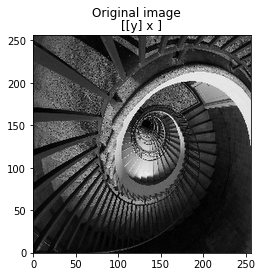

In [4]:
plt.ImagePlot(image, title='Original image')

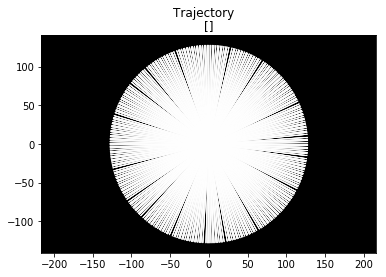

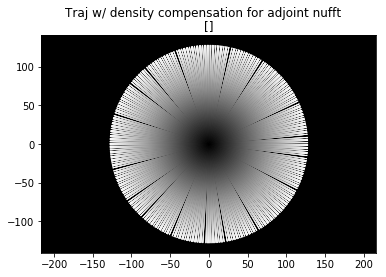

In [5]:
# create trajectory
traj = spmri.radial((360,512,2), (256,256))
plt.ScatterPlot(traj, title='Trajectory')
#print('Trajectory: (first 10 spokes only)')
dcf = (traj[..., 0]**2 + traj[..., 1]**2)**0.5
plt.ScatterPlot(traj, dcf, title='Traj w/ density compensation for adjoint nufft')

Produced k-space: (log to better visualize)


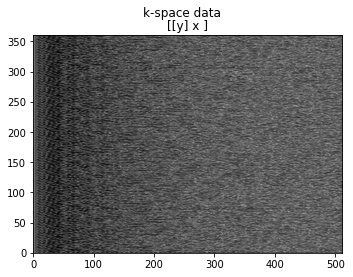

In [6]:
kspace = sp.nufft(image, traj)
print('Produced k-space: (log to better visualize)' )
plt.ImagePlot(np.log(kspace), title='k-space data')

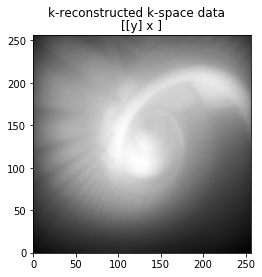

In [7]:
# let's get back to image space: 
image_rec = sp.nufft_adjoint(kspace, traj, (256,256))
plt.ImagePlot(image_rec, title='k-reconstructed k-space data')

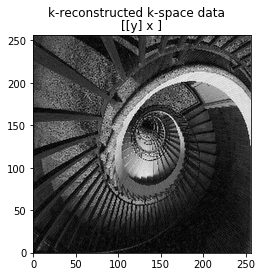

In [8]:
# let's get back to image space with density compensation: 
image_rec = sp.nufft_adjoint(kspace*dcf, traj, (256,256))
plt.ImagePlot(image_rec, title='k-reconstructed k-space data')